In [155]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

### 1. Problem Statement¶

### 2. Data Gathering

In [78]:
df = pd.read_csv('collegePlace.csv')
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [79]:
df = pd.read_csv('collegePlace.csv')
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [80]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


### 3. EDA and Feature Engineering

In [82]:
df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [84]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [85]:
#X = df.drop(columns=['Hostel'], axis = 1)
#df = df.drop(columns=['Hostel'], axis = 1)
#df

In [86]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [87]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [88]:
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Stream'] = le.fit_transform(df['Stream'])

##### 1. gender

In [89]:
df['Gender']

0       1
1       0
2       0
3       1
4       1
       ..
2961    1
2962    1
2963    1
2964    1
2965    1
Name: Gender, Length: 2966, dtype: int32

In [90]:
df['Gender'].value_counts()

Gender
1    2475
0     491
Name: count, dtype: int64

In [91]:
df['Gender'].replace({'Male':1, 'Female':0},inplace = True)

In [92]:
gender_data = {'male':1, 'female':0}

##### 2. Stream

In [93]:
df['Stream'].value_counts()

Stream
1    776
4    691
3    424
5    424
2    334
0    317
Name: count, dtype: int64

In [94]:
df['Stream'].unique()

array([3, 1, 4, 5, 2, 0])

In [95]:
df['Stream'].replace({
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
    
}, inplace=True)

In [96]:
stream_data = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5}

In [97]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [98]:
df.describe()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,2.562374,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.371732,1.653853,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,3.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,4.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [99]:
df['Stream'].unique()

array([3, 1, 4, 5, 2, 0])

#### Target Column

In [100]:
df['PlacedOrNot']

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [101]:
df['PlacedOrNot'].value_counts()

PlacedOrNot
1    1639
0    1327
Name: count, dtype: int64

<Axes: xlabel='PlacedOrNot', ylabel='count'>

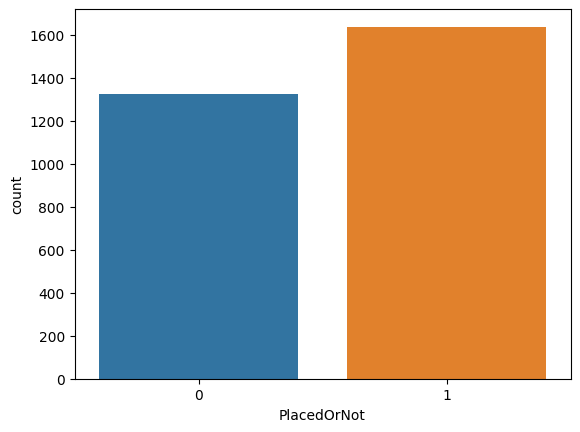

In [102]:
sns.countplot(x = df['PlacedOrNot'])

In [103]:
x = df.drop(columns=['PlacedOrNot'])
x

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,3,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,4,1,6,0,0
3,21,1,4,0,8,0,1
4,22,1,5,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0
2962,23,1,5,1,7,1,0
2963,22,1,4,1,7,0,0
2964,22,1,1,1,7,0,0


In [104]:
y = df['PlacedOrNot']
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

### Model Training

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [106]:
x_train

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
1529,20,1,0,1,6,0,0
97,22,1,4,0,8,0,0
357,22,1,2,0,8,0,0
1948,20,1,4,0,7,0,1
2815,21,1,4,1,8,1,1
...,...,...,...,...,...,...,...
2304,21,1,0,0,7,0,0
968,21,1,5,0,8,1,0
1667,20,1,3,0,7,0,0
1688,24,0,3,0,6,0,0


In [107]:
x_test

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
1696,22,1,1,0,6,0,0
1752,20,1,5,0,6,1,1
2370,19,1,1,1,8,0,0
2270,19,1,5,1,6,1,1
87,21,1,1,0,6,0,0
...,...,...,...,...,...,...,...
1231,21,1,2,1,7,0,0
2258,19,1,1,0,7,0,1
2938,21,1,1,0,7,0,1
1440,21,1,4,0,7,0,1


In [108]:
y_train

1529    0
97      1
357     1
1948    1
2815    1
       ..
2304    0
968     1
1667    0
1688    1
1898    1
Name: PlacedOrNot, Length: 2076, dtype: int64

In [109]:
y_test

1696    0
1752    0
2370    1
2270    0
87      0
       ..
1231    1
2258    1
2938    0
1440    0
591     1
Name: PlacedOrNot, Length: 890, dtype: int64

In [110]:
x_test[55:56]

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2067,20,1,5,0,6,1,0


In [111]:
y_train.value_counts()

PlacedOrNot
1    1145
0     931
Name: count, dtype: int64

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y,      
                                test_size=0.3,                                                     
                                random_state=3,
                                stratify=y
                                )
y_train.value_counts()

PlacedOrNot
1    1147
0     929
Name: count, dtype: int64

#### Instatiating Logistic Regression

In [113]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

#### Model Evaluation

In [114]:
logistic_clf.score(x_train,y_train) # accuracy

0.7750481695568401

In [115]:
logistic_clf.score(x_test,y_test)

0.7471910112359551

In [116]:
y_pred = logistic_clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [117]:
y_pred[30:35]

array([1, 1, 0, 0, 1], dtype=int64)

In [118]:
y_test.value_counts()

PlacedOrNot
1    492
0    398
Name: count, dtype: int64

In [119]:
confusion_matrix(y_test, y_pred)

array([[279, 119],
       [106, 386]], dtype=int64)

In [120]:
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       398
           1       0.76      0.78      0.77       492

    accuracy                           0.75       890
   macro avg       0.74      0.74      0.74       890
weighted avg       0.75      0.75      0.75       890



In [121]:
confusion_matrix(y_test, y_pred)

array([[279, 119],
       [106, 386]], dtype=int64)

In [122]:
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.7471910112359551

In [123]:
pre = metrics.precision_score(y_test,y_pred)
pre

0.7643564356435644

In [124]:
re = metrics.recall_score(y_test,y_pred)
re

0.7845528455284553

In [125]:
f1 = metrics.f1_score(y_test,y_pred)
f1

0.7743229689067203

#### ROC Curve

In [126]:
logistic_clf.predict_proba(x_train)

array([[0.41807388, 0.58192612],
       [0.5457025 , 0.4542975 ],
       [0.73056049, 0.26943951],
       ...,
       [0.60176188, 0.39823812],
       [0.09236713, 0.90763287],
       [0.93130883, 0.06869117]])

In [127]:
logistic_clf.predict_proba(x_train).shape

(2076, 2)

In [128]:
y_pred_train_prob = logistic_clf.predict_proba(x_train)
y_pred_train_prob

array([[0.41807388, 0.58192612],
       [0.5457025 , 0.4542975 ],
       [0.73056049, 0.26943951],
       ...,
       [0.60176188, 0.39823812],
       [0.09236713, 0.90763287],
       [0.93130883, 0.06869117]])

In [129]:
y_test[50:55]

69      1
575     0
948     1
723     1
1722    0
Name: PlacedOrNot, dtype: int64

In [130]:
y_pred_train_prob[50:55]

array([[0.70511837, 0.29488163],
       [0.14314398, 0.85685602],
       [0.35557273, 0.64442727],
       [0.24094194, 0.75905806],
       [0.39594682, 0.60405318]])

In [131]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_train_prob[:,1])
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [132]:
tpr

array([0.        , 0.00174368, 0.01220575, 0.01482127, 0.01743679,
       0.01918047, 0.02615519, 0.03051439, 0.0331299 , 0.03487358,
       0.03661726, 0.03836094, 0.03923278, 0.0418483 , 0.04359198,
       0.04533566, 0.0462075 , 0.04969486, 0.05492589, 0.05666957,
       0.05928509, 0.06277245, 0.06364429, 0.06887533, 0.07061901,
       0.08195292, 0.0836966 , 0.08456844, 0.08631212, 0.08979948,
       0.09590235, 0.10113339, 0.10200523, 0.10462075, 0.10549259,
       0.10723627, 0.10810811, 0.11159547, 0.11246731, 0.11421099,
       0.11508282, 0.11857018, 0.12205754, 0.12728858, 0.13077594,
       0.13339146, 0.13513514, 0.14036617, 0.14298169, 0.14559721,
       0.14821273, 0.15082825, 0.15257193, 0.15605929, 0.16216216,
       0.163034  , 0.16477768, 0.16564952, 0.1673932 , 0.1717524 ,
       0.17349608, 0.17523976, 0.18047079, 0.18395815, 0.18570183,
       0.19093287, 0.19616391, 0.20836966, 0.21185702, 0.21970357,
       0.22493461, 0.22580645, 0.22929381, 0.23103749, 0.23452

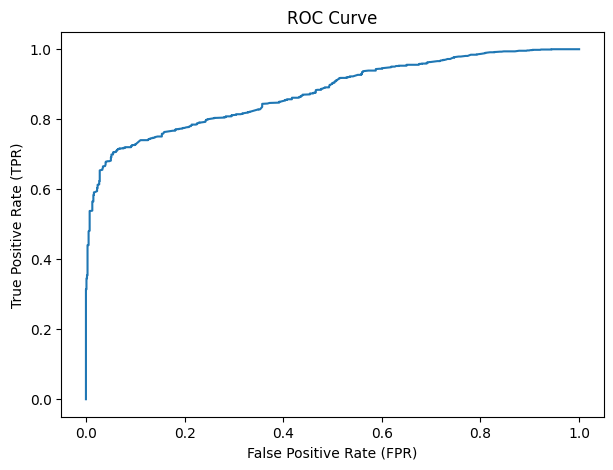

In [133]:
plt.figure(figsize=(7,5))
plt.title("ROC Curve")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.savefig("ROC_Curve.png")

In [134]:
import plotly.express as px

In [135]:
px.scatter(x = fpr,y = tpr)

#### Prediction on Single Row

In [136]:
x_test[25:26]

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2114,22,1,4,1,6,0,0


In [137]:
logistic_clf.classes_

array([0, 1], dtype=int64)

In [138]:
logistic_clf.coef_

array([[ 0.27644507, -0.04804527,  0.04695507,  0.78016698,  1.91771354,
        -0.40824749, -0.08583817]])

In [139]:
logistic_clf.n_features_in_

7

In [140]:
gender_data = {'male':1, 'female': 0}

In [141]:
import numpy as np

# Define the mappings
gender_data = {'male': 1, 'female': 0}
stream_data = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
}

# Example data
Gender = 'male'
Stream = 'Electronics And Communication'
Internships = 2
CGPA = 8.5

# Convert the values
Gender = gender_data[Gender]
Stream = stream_data[Stream]

test_array = np.zeros(logistic_clf.n_features_in_)
test_array




array([0., 0., 0., 0., 0., 0., 0.])

In [142]:
import numpy as np

# Define the mappings
gender_data = {'male': 1, 'female': 0}
stream_data = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
}

# Example data
Gender = 'male'
Stream = 'Electronics And Communication'
Internships = 2
CGPA = 8.5

# Convert the values
Gender = gender_data[Gender]
Stream = stream_data[Stream]

test_array = np.zeros([1,logistic_clf.n_features_in_])
test_array


array([[0., 0., 0., 0., 0., 0., 0.]])

In [143]:
import numpy as np

# Define the mappings
gender_data = {'male': 1, 'female': 0}
stream_data = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
}

# Example data
Gender = 'male'
Stream = 'Electronics And Communication'
Internships = 2
CGPA = 8.5

# Convert the values
Gender = gender_data[Gender]
Stream = stream_data[Stream]

test_array = np.zeros([1,logistic_clf.n_features_in_])

test_array[0,0] = Gender
test_array[0,1] = Stream
test_array[0,2] = Internships
test_array[0,3] = CGPA

test_array


array([[1. , 0. , 2. , 8.5, 0. , 0. , 0. ]])

In [144]:
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train and y_train as the training data
# Train a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)


LogisticRegression()

In [145]:
import numpy as np

# Define the mappings
gender_data = {'male': 1, 'female': 0}
stream_data = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
}

# Example data
age = 30
Gender = 'male'
Stream = 'Electronics And Communication'
Internships = 2
CGPA = 8.5

# Convert the values
Gender = gender_data[Gender]
Stream = stream_data[Stream]

test_array = np.zeros([1,logistic_clf.n_features_in_])

test_array[0,0] = Gender
test_array[0,1] = Stream
test_array[0,2] = Internships
test_array[0,3] = CGPA

test_array

logistic_reg.predict(test_array)


array([0], dtype=int64)

In [146]:
import numpy as np

# Define the mappings
gender_data = {'male': 1, 'female': 0}
stream_data = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
}

# Example data
Gender = 'male'
Stream = 'Electronics And Communication'
Internships = 2
CGPA = 8.5

# Convert the values
Gender = gender_data[Gender]
Stream = stream_data[Stream]

test_array = np.zeros([2,logistic_clf.n_features_in_])

test_array[0,0] = Gender
test_array[0,1] = Stream
test_array[0,2] = Internships
test_array[0,3] = CGPA

test_array

logistic_reg.predict(test_array)


array([0, 0], dtype=int64)

In [147]:
import numpy as np

# Define the mappings
gender_data = {'male': 1, 'female': 0}
stream_data = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
}

# Example data
Age = 30
Gender = 'male'
Stream = 'Electronics And Communication'
Internships = 2
CGPA = 8.5
Hostel = 1
HistoryOfBacklogs = 0


Gender = gender_data[Gender]
Stream = stream_data[Stream]


test_array = np.array([Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs])


prediction = logistic_reg.predict([test_array])


In [148]:
import pandas as pd
pd.__version__

'2.0.0'

In [149]:
import flask
flask.__version__

'2.3.2'

In [150]:
import sklearn
sklearn.__version__

'1.2.2'

In [151]:
import numpy as np
np.__version__

'1.24.2'

In [162]:
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train and y_train as the training data
# Train a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [159]:
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logistic_reg, file)

In [163]:
import numpy as np

# Define the mappings
gender_data = {'male': 1, 'female': 0}
stream_data = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
}

# Example data
Gender = 'male'
Stream = 'Electronics And Communication'
Internships = 2
CGPA = 8.5

# Convert the values
Gender = gender_data[Gender]
Stream = stream_data[Stream]

test_array = np.zeros([2,logistic_clf.n_features_in_])


test_array[0,0] = Age
test_array[0,1] = Gender
test_array[0,2] = Stream
test_array[0,3] = Internships
test_array[0,4] = CGPA
test_array[0,5] = HistoryOfBacklogs

test_array

logistic_reg.predict(test_array)


array([1, 0], dtype=int64)